# Ch03.데이터 분석 절차

## 1.기본 package 설정

In [1]:
## 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환
from sklearn import datasets # python 저장 데이터 가져오기

## 3.데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split 

## 5.분류모델구축 (3장.p.83~130)
from sklearn.tree import DecisionTreeClassifier # 결정 트리
from sklearn.naive_bayes import GaussianNB # 나이브 베이즈
from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.ensemble import BaggingClassifier # 앙상블
from sklearn.linear_model import Perceptron # 퍼셉트론
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델
from sklearn.svm import SVC # 서포트 벡터 머신(SVM)
from sklearn.neural_network import MLPClassifier # 다층인공신경망

## 6.모델검정
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # 정확도, 민감도 등
from sklearn.metrics import roc_curve, auc # ROC 곡선 그리기

## 7.최적화
from sklearn.model_selection import cross_validate # 교차타당도
from sklearn.pipeline import make_pipeline # 파이프라인 구축
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝

## 2.데이터 가져오기

### 2.1 데이터프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [2]:
rm_df = pd.read_csv('RidingMowers.csv')
rm_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


- 자료구조 살펴보기

In [3]:
rm_df.shape

(48, 3)

In [4]:
rm_df.keys()

Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')

### 2.2 data와 target으로 분리
- 필요한 데이터만 추출
- data: X, target: y 로 분리

In [5]:
X = rm_df.drop (['Ownership'], axis=1)
X.head()

,Income,Lot_Size
0,60.0,18.4
1,85.5,16.8
2,64.8,21.6
3,61.5,20.8
4,87.0,23.6


In [6]:
y = rm_df['Ownership']
y.head()

0    Owner
1    Owner
2    Owner
3    Owner
4    Owner
Name: Ownership, dtype: object

## 3.데이터 전처리

### 3.1 data(X) 레이블 인코딩
- 문자형 자료를 숫자(범주형)로 인코딩
- 숫자형 자료를 표준화
- 결정나무, 랜덤 포레스트, 나이브 베이즈 분류 : 원본데이터 그대로 유지

### 3.2 Class(target) 레이블 인코딩

In [7]:
class_le = LabelEncoder()
y = class_le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

## 4.훈련/검증용 데이터 분할
- test_size: 검증데이터 30%
- random_state : random seed 번호 = 1
- stratify : y(클래스)의 비율에 따라 분할

In [8]:
# \ 이후에 space 없어야 함
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, 
                         test_size=0.3, 
                         random_state=1, 
                         stratify=y)

## 5.모델구축

In [9]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=1,
                              random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## 6.모델검정

### 6.1 검증용 데이터로 예측
- tree.predict (class로 표시)
- tree.predict_proba (확률값으로 표시)

In [10]:
y_pred = tree.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [11]:
y_pred_p = tree.predict_proba(X_test)
y_pred_p

array([[0.23529412, 0.76470588],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ]])

### 6.2 정오분류표로 검정

In [12]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],5,2
True[1],3,5


In [13]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.71      0.62      0.67         8

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.67        15
weighted avg       0.67      0.67      0.67        15



### 6.3 정확도, 민감도 확인
- 클래스가 2개일 경우에만 실행

In [14]:
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 5
정확도: 0.667
정밀도: 0.714
재현율: 0.625
F1: 0.667


### 부록: 훈련데이터 검증할 때
- X_train, y_train 으로 입력

In [15]:
y_pred_t = tree.predict(X_train)
y_pred_t

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [16]:
confmat = pd.DataFrame(confusion_matrix(y_train, y_pred_t),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],13,4
True[1],3,13


### 6.4 ROC 곡선 그리기
- decision_function 사용가능한 모델일 경우: tree.decision_function(X_test)
- decision_function 사용이 안되는 모델일 경우:tree.predict_proba(X_test)[:, 1]

In [17]:
# fpr, tpr, thresholds = roc_curve(y_test, tree.decision_function(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])

In [18]:
fpr, tpr, thresholds

(array([0.        , 0.28571429, 1.        ]),
 array([0.   , 0.625, 1.   ]),
 array([1.76470588, 0.76470588, 0.1875    ]))

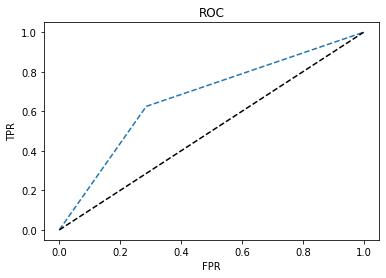

In [19]:
plt.plot(fpr, tpr, '--', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

## 7.최적화
- 교재 6장 (pp.218~250)

### 7.1 교차검정
- 5장, 6장의 default model 정확도= 0.981 과 비교
- 7.3부터 최적화를 위해서 교차검정 방법을 사용

### 7.2 파이프라인 모델 만들기
- 파이프라인을 이용하여 최적 모델 만들기
- 기본모형은 아무 옵션이 없는 모델로 부터 시작
- 파라미터 옵션 확인: pipe_tree.get_params().keys()

### 7.3 학습 곡선으로 편향과 분산 문제 분석하기
- 훈렴 샘플링 수를 이용하여 편향과 분산 검정
- 편향: 정확도가 높은지 검정
- 분산: 훈련/검정 데이터의 정확도의 차이가 적은지

### 7.4 검증 곡선으로 과대적합과 과소적합 조사하기
- 과대적합 : 파라미터가 많음 -> 파라미터 축소
- 과소적합 : 파라미터가 적음 -> 파라미터 추가

### 7.5 하이퍼파라미터 튜닝
- 그리드 서치를 사용한 머신 러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼 파라미터 튜닝

## 8.최적화 모델 검정
- 최적모델을 이용해 검정 데이터(full data) 최종 확인
- 검증용 데이터로 예측
- 정오분류표로 검정
- 정확도, 민감도 확인
- ROC 곡선 그리기